# Different Optimizers and Learning Rate Scheduling

## Setup

In [ ]:
import os
if os.getcwd().endswith("notebooks"):
    os.chdir('..')

print("Current working directory: ", os.getcwd())
if not os.getcwd().endswith("CIFAR-100-DNN-Optimization"):
    raise ValueError("Please change working directory to 'path/CIFAR-100-DNN-Optimization' before proceeding")

Current working directory:  /Users/irellzane/MLprojects/CIFAR-100-DNN-Optimization


In [ ]:
!pip install -r requirements.txt

In [ ]:
import pickle
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.layers import Dense, Flatten, Input, BatchNormalization, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler, ReduceLROnPlateau

## Load Data

In [ ]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

data_pre_path = './data/CIFAR-100/'

In [ ]:
data_train_path = data_pre_path + 'train'
data_test_path = data_pre_path + 'test'
data_train_dict = unpickle(data_train_path)
data_test_dict = unpickle(data_test_path)
data_train = data_train_dict[b'data']
y_train_valid = np.array(data_train_dict[b'fine_labels'])
data_test = data_test_dict[b'data']
y_test = np.array(data_test_dict[b'fine_labels'])

In [ ]:
X_train_valid = data_train.reshape(-1, 3, 32, 32).transpose(0,2,3,1) / 255
X_test = data_test.reshape(-1, 3, 32, 32).transpose(0,2,3,1) / 255

## Data splitting

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=5000/50000, stratify=y_train_valid, random_state=42)

## Nesterov Accelerated Gradient

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

model = Sequential()
model.add(Input(shape=input_shape))
model.add(Flatten())

for _ in range(10):
    model.add(Dense(400, activation="swish", kernel_initializer="he_normal"))
    
model.add(Dense(100, activation="softmax"))

optimizer = tf.keras.optimizers.SGD(nesterov=True)

model.compile(loss="sparse_categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [ ]:
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=30, batch_size=128, callbacks=[early_stopping])

Epoch 1/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.0122 - loss: 4.6039 - val_accuracy: 0.0122 - val_loss: 4.5803
Epoch 2/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.0125 - loss: 4.5604 - val_accuracy: 0.0256 - val_loss: 4.5129
Epoch 3/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.0315 - loss: 4.4729 - val_accuracy: 0.0578 - val_loss: 4.3227
Epoch 4/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.0709 - loss: 4.2001 - val_accuracy: 0.0930 - val_loss: 4.0217
Epoch 5/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.1044 - loss: 3.9504 - val_accuracy: 0.1200 - val_loss: 3.8486
Epoch 6/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.1255 - loss: 3.7937 - val_accuracy: 0.1360 - val_loss: 3.7448
Epoch 7/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.1428 - loss: 3.6823 - val_accuracy: 0.1464 - val_loss: 3.6713
Epoch 8/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.1557 - loss: 3.5941 - val_accu

In [ ]:
def plot_history(history):
    hist_df = pd.DataFrame(history.history)
    hist_df.plot(style=["g+--", "ro--", "b*-", "k^-"], alpha=0.8, xlabel="epoch")
    plt.show()

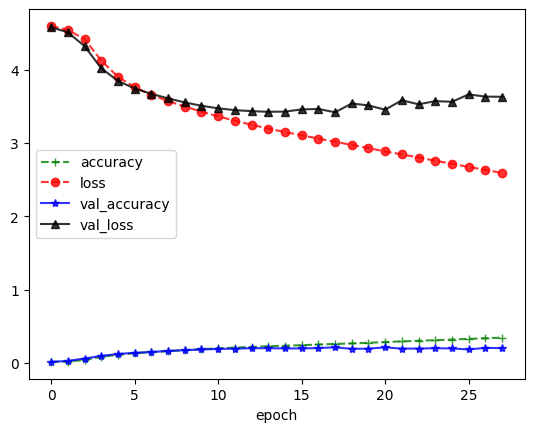

In [ ]:
plot_history(history)